In [1]:
%matplotlib inline

import warnings
import itertools    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

/Users/fayyaanyatasia/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
print(np.__path__)

['/Users/fayyaanyatasia/anaconda3/envs/deeplearning/lib/python3.8/site-packages/numpy']


In [3]:
df = pd.read_csv("clean_data.csv")
df.shape

(1584, 134)

In [4]:
df.head()

,Time,Time.1,EOG,EOG.1,EOG.2,EOG.3,ACC,ACC.1,EDA,EDA.1,...,EEGConn.52,EEGConn.53,EEGConn.54,EEGConn.55,EEGConn.56,EEGConn.57,EEGConn.58,EEGConn.59,Type,Valence
0,279.0,283.0,0.03501,0.18852,528.30090,1653.59465,0.08911,6520.83036,0.0,0.00030,...,0.42665,0.60355,0.14867,0.04928,0.02832,0.07146,0.15614,0.34833,Training,Positive
1,280.0,284.0,0.03269,0.18852,530.00618,1663.87925,0.07023,6531.95043,0.0,0.00003,...,0.15314,0.03407,0.04494,0.37336,0.33283,0.19793,0.03080,0.34791,Training,Positive
2,281.0,285.0,0.03522,0.16972,527.78995,1650.26793,0.03413,6524.41338,0.0,0.00001,...,0.03363,0.02157,0.21674,0.26975,0.10365,0.19533,0.11734,0.49382,Training,Positive
3,282.0,286.0,0.03522,0.16972,527.84376,1645.88954,0.02725,6522.16183,0.0,0.00004,...,0.01636,0.01908,0.11374,0.32255,0.11144,0.19649,0.02880,0.43887,Training,Positive
4,283.0,287.0,0.03608,0.16972,530.29163,1653.78549,0.02725,6520.32162,0.0,0.00003,...,0.00954,0.00278,0.13529,0.37243,0.11986,0.09740,0.04926,0.51518,Training,Positive


In [5]:
# Distribution of label

print('Training Positive:', len(df[(df['Type'] == 'Training') & (df['Valence'] == 'Positive')]))
print('Training Negative:', len(df[(df['Type'] == 'Training') & (df['Valence'] == 'Negative')]))
print('Testing Positive:', len(df[(df['Type'] == 'Testing') & (df['Valence'] == 'Positive')]))
print('Testing Negative:', len(df[(df['Type'] == 'Testing') & (df['Valence'] == 'Negative')]))

Training Positive: 168
Training Negative: 168
Testing Positive: 624
Testing Negative: 624


In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
le = LabelEncoder()
df['Valence'] = le.fit_transform(df['Valence'])
df.head()

,Time,Time.1,EOG,EOG.1,EOG.2,EOG.3,ACC,ACC.1,EDA,EDA.1,...,EEGConn.52,EEGConn.53,EEGConn.54,EEGConn.55,EEGConn.56,EEGConn.57,EEGConn.58,EEGConn.59,Type,Valence
0,279.0,283.0,0.03501,0.18852,528.30090,1653.59465,0.08911,6520.83036,0.0,0.00030,...,0.42665,0.60355,0.14867,0.04928,0.02832,0.07146,0.15614,0.34833,Training,1
1,280.0,284.0,0.03269,0.18852,530.00618,1663.87925,0.07023,6531.95043,0.0,0.00003,...,0.15314,0.03407,0.04494,0.37336,0.33283,0.19793,0.03080,0.34791,Training,1
2,281.0,285.0,0.03522,0.16972,527.78995,1650.26793,0.03413,6524.41338,0.0,0.00001,...,0.03363,0.02157,0.21674,0.26975,0.10365,0.19533,0.11734,0.49382,Training,1
3,282.0,286.0,0.03522,0.16972,527.84376,1645.88954,0.02725,6522.16183,0.0,0.00004,...,0.01636,0.01908,0.11374,0.32255,0.11144,0.19649,0.02880,0.43887,Training,1
4,283.0,287.0,0.03608,0.16972,530.29163,1653.78549,0.02725,6520.32162,0.0,0.00003,...,0.00954,0.00278,0.13529,0.37243,0.11986,0.09740,0.04926,0.51518,Training,1


In [71]:
train_data = df[df['Type'] == 'Training']
test_data = df[df['Type'] == 'Testing']

In [72]:
train_data_X = train_data.loc[:, ~train_data.columns.isin(['Type', 'Valence', 'Time', 'Time.1'])]
train_data_y = train_data.loc[:, 'Valence']

test_data_X = test_data.loc[:, ~test_data.columns.isin(['Type', 'Valence', 'Time', 'Time.1'])]
test_data_y = test_data.loc[:, 'Valence']

In [73]:
train_data_X.shape

(336, 130)

In [74]:
# positive = 1, negative = 0

X_train = np.array(train_data_X).reshape((train_data_X.shape[0],train_data_X.shape[1],1))
X_test = np.array(test_data_X).reshape((test_data_X.shape[0],test_data_X.shape[1],1))

y_train = pd.get_dummies(train_data_y)
y_test = pd.get_dummies(test_data_y)

## GRU

In [11]:
import tensorflow as tf

In [12]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, Dropout, BatchNormalization, GRU
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [75]:
inputs = Input(shape=(X_train.shape[1],1))

gru = GRU(256, return_sequences=True)(inputs)
flat = Flatten()(gru)
outputs = Dense(2, activation='softmax')(flat)

model_gru = Model(inputs, outputs)

model_gru.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 130, 1)]          0         
                                                                 
 gru_3 (GRU)                 (None, 130, 256)          198912    
                                                                 
 flatten_6 (Flatten)         (None, 33280)             0         
                                                                 
 dense_6 (Dense)             (None, 2)                 66562     
                                                                 
Total params: 265,474
Trainable params: 265,474
Non-trainable params: 0
_________________________________________________________________


In [76]:
def train_model(model,x_train,y_train,x_test,y_test, save_to, epoch = 2):

        opt_adam = Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        mc = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
        
        model.compile(optimizer=opt_adam,
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])
        
        history = model.fit(x_train,y_train,
                        batch_size=32,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[es,mc,lr_schedule])
        
        saved_model = load_model(save_to + '_best_model.h5')
        
        return model,history

In [77]:
gru_model,gru_history = train_model(model_gru, X_train, y_train,X_test, y_test, save_to= './', epoch = 50)

Epoch 1/50


2022-11-08 20:17:39.223381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-08 20:17:39.310643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-08 20:17:39.966426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - ETA: 0s - loss: 0.9951 - accuracy: 0.4851

2022-11-08 20:17:41.505458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-08 20:17:41.541046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./_best_model.h5
11/11 [==============================] - 4s 211ms/step - loss: 0.9951 - accuracy: 0.4851 - val_loss: 0.9724 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.7389 - accuracy: 0.5417
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 1s 103ms/step - loss: 0.7389 - accuracy: 0.5417 - val_loss: 0.7252 - val_accuracy: 0.5000 - lr: 9.0484e-04
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6654 - accuracy: 0.5774
Epoch 3: val_accuracy improved from 0.50000 to 0.52484, saving model to ./_best_model.h5
11/11 [==============================] - 1s 106ms/step - loss: 0.6654 - accuracy: 0.5774 - val_loss: 0.6856 - val_accuracy: 0.5248 - lr: 8.1873e-04
Epoch 4/50
11/11 [==============================] - ETA: 0s - loss: 0.6520 - accuracy: 0.5476
Epoch 4: val_accuracy improved from 0.52484 to 0.54

In [78]:
def plot_model(history, model_name):
    # summarize accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(model_name + ' accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(model_name + ' loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

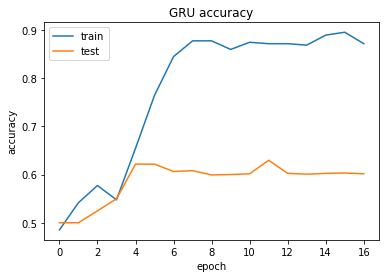

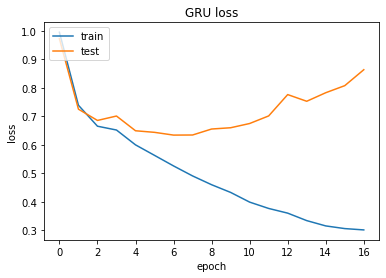

In [79]:
plot_model(gru_history, 'GRU')

In [80]:
model_gru_acc = model_gru.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_gru_acc * 100))

Test Accuracy: 60.176%


2022-11-08 19:08:36.891507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-08 19:08:36.916404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 1s 15ms/step


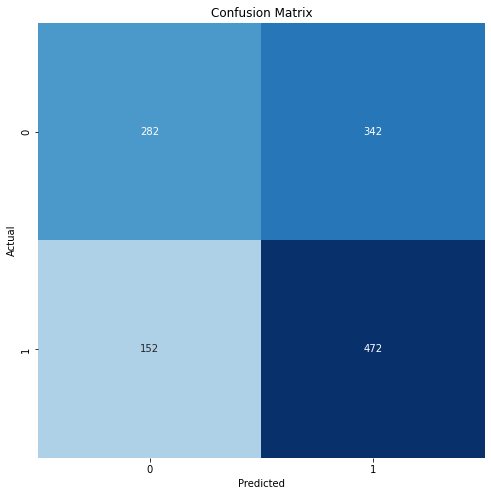

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.65      0.45      0.53       624
           1       0.58      0.76      0.66       624

    accuracy                           0.60      1248
   macro avg       0.61      0.60      0.59      1248
weighted avg       0.61      0.60      0.59      1248



In [61]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model_gru.predict(X_test))))
y_test = y_test.idxmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

## LSTM

In [65]:
y_test.shape

(1248, 2)

In [57]:
i_lstm = Input(shape=(X_train.shape[1], 1))

x_lstm = LSTM(256, return_sequences=True)(i_lstm)
x_lstm = Flatten()(x_lstm)
y_lstm = Dense(2, activation='softmax')(x_lstm)

model_lstm = Model(i_lstm, y_lstm)

model_lstm.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 130, 1)]          0         
                                                                 
 lstm_2 (LSTM)               (None, 130, 256)          264192    
                                                                 
 flatten_5 (Flatten)         (None, 33280)             0         
                                                                 
 dense_5 (Dense)             (None, 2)                 66562     
                                                                 
Total params: 330,754
Trainable params: 330,754
Non-trainable params: 0
_________________________________________________________________


In [58]:
lstm_model,lstm_history = train_model(model_lstm, X_train, y_train,X_test, y_test, save_to= './best_lstm_model.h5', epoch = 50)

Epoch 1/50


2022-11-08 19:06:38.805575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-08 19:06:38.885564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-08 19:06:39.065362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - ETA: 0s - loss: 1.2353 - accuracy: 0.4643

2022-11-08 19:06:40.373855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-08 19:06:40.407455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./best_lstm_model.h5_best_model.h5
11/11 [==============================] - 3s 187ms/step - loss: 1.2353 - accuracy: 0.4643 - val_loss: 0.6969 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.7090 - accuracy: 0.4821
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 1s 109ms/step - loss: 0.7090 - accuracy: 0.4821 - val_loss: 0.6942 - val_accuracy: 0.5000 - lr: 9.0484e-04
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5119
Epoch 3: val_accuracy did not improve from 0.50000
11/11 [==============================] - 1s 107ms/step - loss: 0.6931 - accuracy: 0.5119 - val_loss: 0.7108 - val_accuracy: 0.5000 - lr: 8.1873e-04
Epoch 4/50
11/11 [==============================] - ETA: 0s - loss: 0.6489 - accuracy: 0.5744
Epoch 4: val_accuracy improved from 0.50000 to 0.58734, saving model to

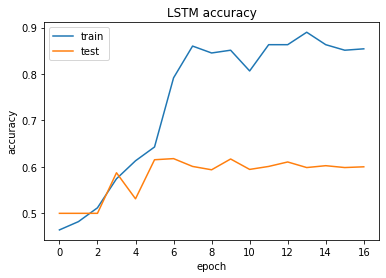

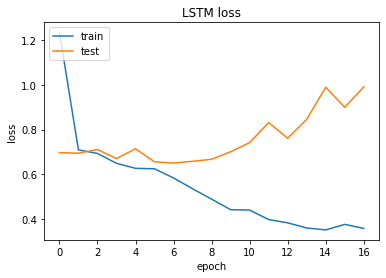

In [59]:
plot_model(lstm_history, 'LSTM')

In [60]:
model_lstm_acc = model_lstm.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_lstm_acc * 100))

Test Accuracy: 60.016%


39/39 [==============================] - 1s 16ms/step


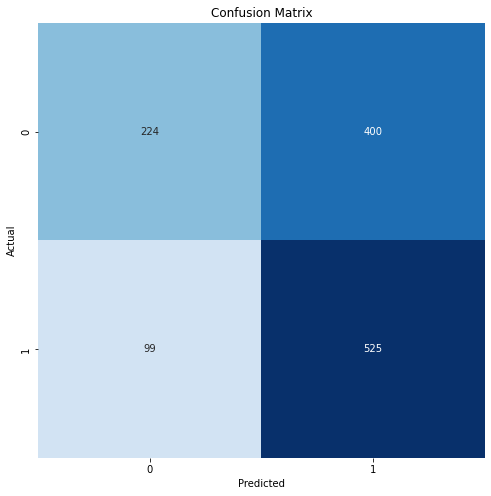

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.69      0.36      0.47       624
           1       0.57      0.84      0.68       624

    accuracy                           0.60      1248
   macro avg       0.63      0.60      0.58      1248
weighted avg       0.63      0.60      0.58      1248



In [66]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model_lstm.predict(X_test))))
y_test = y_test.idxmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

## DNN

In [67]:
X_train = StandardScaler().fit_transform(train_data_X)
X_test = StandardScaler().fit_transform(test_data_X)

y_train = pd.get_dummies(train_data_y)
y_test = pd.get_dummies(test_data_y)

In [70]:
y_train.shape

(336, 2)

In [ ]:
i_dnn = Input(shape=(130, ))

x_dnn = Dense(2548, activation='relu')(i_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.25)(x_dnn)

x_dnn = Dense(3822, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.27)(x_dnn)

x_dnn = Dense(5096, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.3)(x_dnn)

x_dnn = Dense(3822, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.27)(x_dnn)

x_dnn = Dense(2548, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.25)(x_dnn)

y_dnn = Dense(2, activation='softmax')(x_dnn)

dnn_model = Model(i_dnn, y_dnn)

dnn_model.summary()